In [1]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_percentage_error

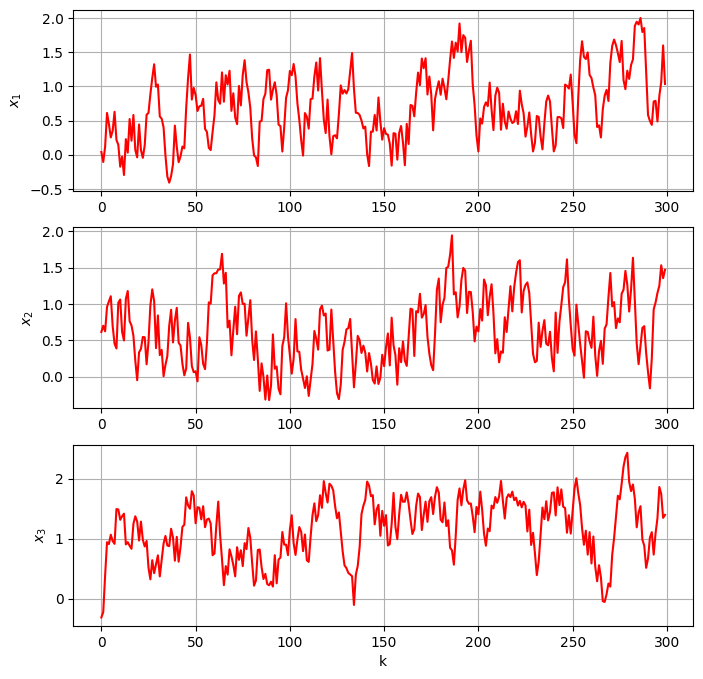

In [2]:
# ========================================== SISTEMA ==========================================

# Número de amostras
N = 300

# Vetor de amostras
k_ = np.arange(0, N, 1)

# atrizes do Sistema 
A = np.array([[0.8, 0.1, 0.005],
              [0, 0.7, 0.1    ],
              [0, 0, 0.9      ]])

B = np.array([[1, 0.05, 0.0025],
              [0, 1, 0.05     ],
              [0, 0, 1        ]])

H = np.array([[1, 1, 1]])

# Matriz de ponderação do ruído do processo
G = 0.2*np.eye(3)

# Entrada do sistema
u = np.random.rand(3,N)-0.5

# Ruído do processo
w = np.random.rand(3,N)

# Ruído de medição
v = np.random.rand(N)*0.5

# Estado inicial
x0 = np.random.rand(3,1)*0.1

# Inicialização do vetor de estados
x = np.zeros((3,N))

# Inicialização do vetor de saída
z = np.zeros(N)

# Simulação da equação de estados
for k in range(N):
    x[:,k][:, np.newaxis] = A@x0 + B@u[:,k][:, np.newaxis] + G@w[:,k][:, np.newaxis]
    z[k] = H@x[:,k][:, np.newaxis] + v[k]
    x0 = x[:,k][:, np.newaxis]

# Plot dos estados do sistema 
plt.figure(figsize=(8, 8))

plt.subplot(3, 1, 1)
plt.plot(k_, x[0,:], 'r')
plt.ylabel('$x_1$')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(k_, x[1,:], 'r')
plt.ylabel('$x_2$')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(k_, x[2,:], 'r')
plt.ylabel('$x_3$')
plt.xlabel('k')
plt.grid()

plt.show()

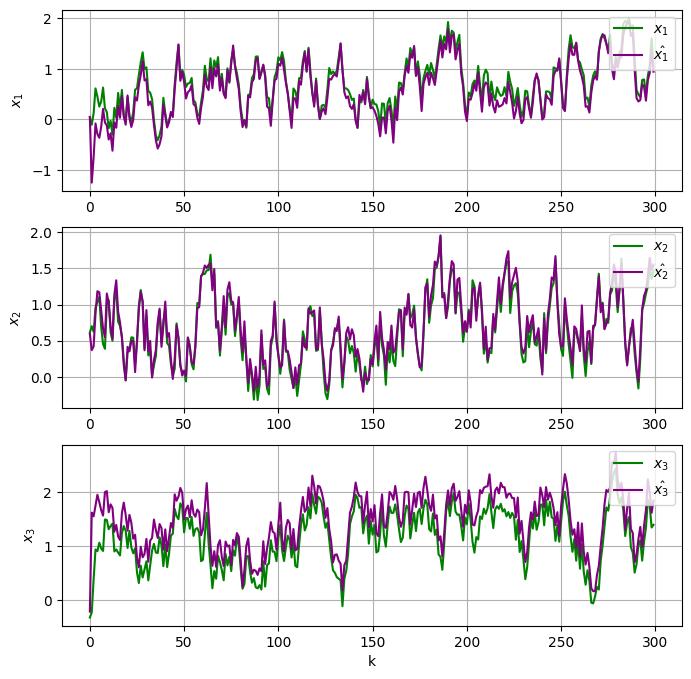

In [3]:
# ========================================== FILTRO ==========================================

# Matriz de covariância
P = 100*np.eye(3)

# Matriz de covariância do ruído do processo
Q = 10*np.eye(3)

# Covariância do ruído da medida
R = 0.1

# Estado inicial estimado
xh0 = np.zeros((3,1))

# Inicialização do vetor de estados estimados
xh = np.zeros((3,N))

# Inicialização do vetor de saída estimada
zh = np.zeros(N)

# Vetor p/ o traço da matriz P
P_trace = np.zeros(N)

# Vetor do erro a priori
error = np.zeros(N)

# Algoritmo de filtragem do sinal - utiliza apenas o sinal de saída do sistema (z)
for k in range(N):
    # Predição
    xh[:,k][:, np.newaxis] = A@xh0 + B@u[:,k][:, np.newaxis]
    P = A@P@A.T + G@Q@G.T

    # Ganho do filtro
    K = (P@H.T)/(H@P@H.T+R)

    # Atualização
    xh[:,k][:, np.newaxis] = xh[:,k][:, np.newaxis] + K*(z[k]-H@xh[:,k][:, np.newaxis])
    P = P - K@H@P

    # Saída estimada
    zh[k] = H@xh[:,k][:, np.newaxis] + v[k]

    # Novo estado inicial
    xh0 = xh[:,k][:, np.newaxis]

    # Traço da P
    P_trace[k] = np.trace(P)

    # Erro a priori
    error[k] = z[k]-H@xh[:,k][:, np.newaxis]

# Plot dos estados estimados e reais do sistema 
plt.figure(figsize=(8, 8))

plt.subplot(3, 1, 1)
plt.plot(k_, x[0,:], 'g', label='$x_1$')
plt.plot(k_, xh[0,:], 'purple', label='$\hat{x_1}$')
plt.ylabel('$x_1$')
plt.legend(loc='upper right')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(k_, x[1,:], 'g', label='$x_2$')
plt.plot(k_, xh[1,:], 'purple', label='$\hat{x_2}$')
plt.ylabel('$x_2$')
plt.legend(loc='upper right')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(k_, x[2,:], 'g', label='$x_3$')
plt.plot(k_, xh[2,:], 'purple', label='$\hat{x_3}$')
plt.ylabel('$x_3$')
plt.legend(loc='upper right')
plt.xlabel('k')
plt.grid()

plt.show()

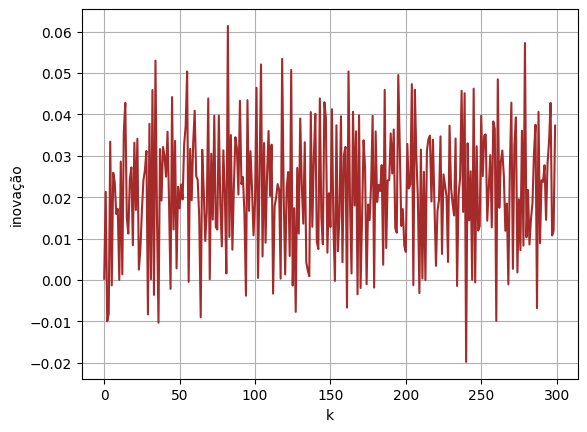

In [4]:
# Plot da inovação

plt.plot(k_, error, 'brown')
plt.xlabel('k')
plt.ylabel('inovação')
plt.grid()
plt.show()

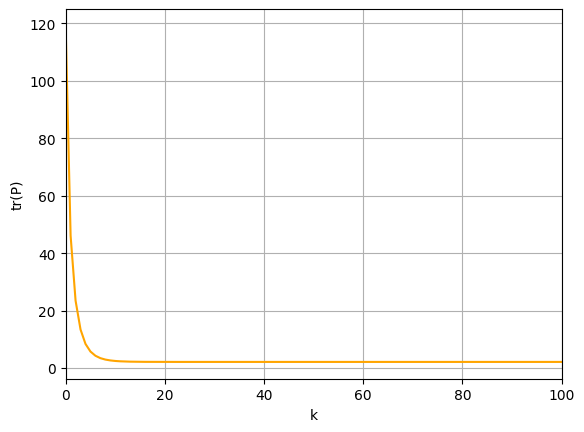

In [5]:
# Plot do traço da matriz P

plt.plot(k_, P_trace, color='orange')
plt.xlabel('k')
plt.ylabel('tr(P)')
plt.xlim(0, 100)
plt.grid()
plt.show()

Erro médio absoluto = 9.64189504383423 %


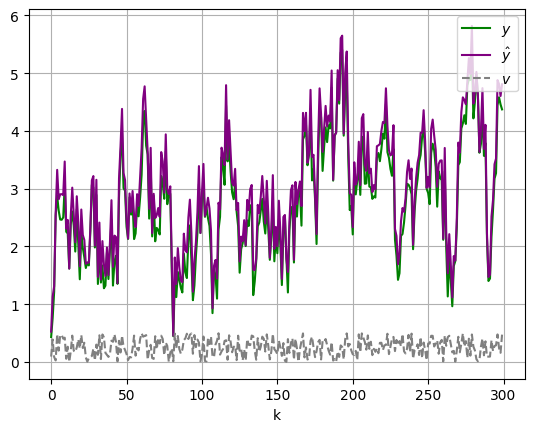

In [6]:
# Comparação entre a saída real e a estimada

# Erro
erro = np.mean(np.abs((z-zh)/(z))*100)
print("Erro médio absoluto =", erro, "%")

plt.plot(k_, z, 'green', label='$y$')
plt.plot(k_, zh, 'purple', label='$\hat{y}$')
plt.plot(k_, v, 'gray', label='$v$', linestyle='--')
plt.xlabel('k')
plt.legend(loc='upper right')
plt.grid()
plt.show()

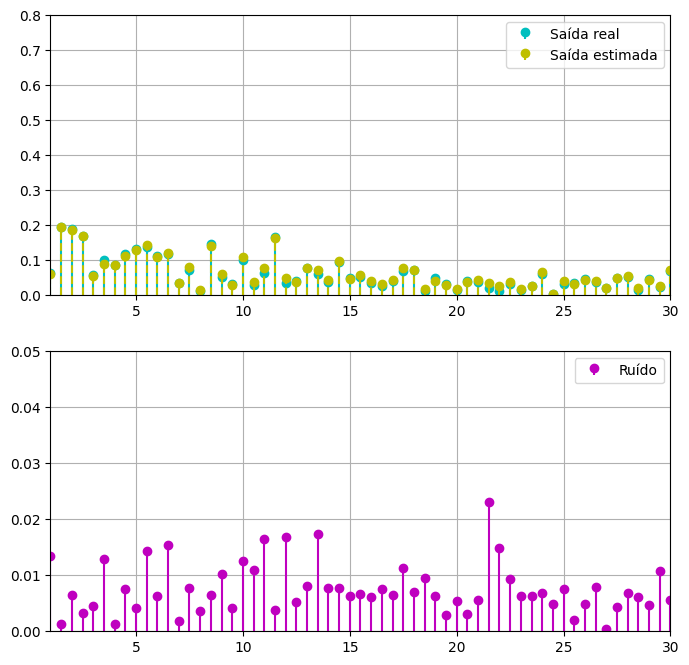

In [7]:
# Espectro de frequência do sinal gerado, recuperado e de ruído

N = len(k_)
Ts = 1/N
Fs = 1/Ts

FFT = np.fft.fft(z)
freqs = np.fft.fftfreq(N, 2/Fs)

FFT = FFT[:len(FFT)//2]
freqs = freqs[:len(freqs)//2]

magnitude = np.abs(FFT)/Fs

FFT_2 = np.fft.fft(v)
FFT_2 = FFT_2[:len(FFT_2)//2]
magnitude_2 = np.abs(FFT_2)/Fs

FFT_3 = np.fft.fft(zh)
FFT_3 = FFT_3[:len(FFT_3)//2]
magnitude_3 = np.abs(FFT_3)/Fs

plt.figure(figsize=(8, 8))

plt.subplot(2,1,1)
plt.stem(freqs, magnitude, linefmt='c-', markerfmt='co', basefmt='none', label='Saída real')
plt.stem(freqs, magnitude_3, linefmt='y--', markerfmt='yo', basefmt='none', label='Saída estimada')
plt.legend()
plt.xlim([1, 30])
plt.ylim([0, 0.8])
plt.grid()

plt.subplot(2,1,2)
plt.stem(freqs, magnitude_2, linefmt='m-', markerfmt='mo', basefmt='none', label='Ruído')
plt.legend()
plt.xlim([1, 30])
plt.ylim([0, 0.05])
plt.grid()

plt.show()